In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('fdia_data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

fdia_data/data3.csv
fdia_data/data7.csv
fdia_data/data13.csv
fdia_data/data12.csv
fdia_data/data5.csv
fdia_data/data2.csv
fdia_data/data4.csv
fdia_data/data6.csv
fdia_data/data11.csv
fdia_data/data10.csv
fdia_data/data8.csv
fdia_data/data15.csv
fdia_data/data14.csv
fdia_data/data1.csv
fdia_data/data9.csv


In [2]:
import pandas as pd  
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

In [8]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

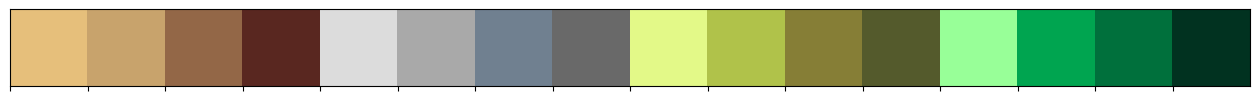

In [9]:
colors = [
    "#e6bf7b", "#c8a36c", "#936747", "#592720", "#dcdcdc", "#a9a9a9",
    "#708090", "#696969", "#e3f988", "#b0c24a", "#867e36", "#545a2c",
    "#98ff98", "#00a550", "#00703c", "#013220"
]
sns.palplot(sns.color_palette(colors))

In [6]:

# # Create a new DataFrame to store the ranges in a tabular format
# ranges_df = pd.DataFrame(columns=['Column Name', 'Min', 'Max'])

# # Calculate the range for each column (assuming numeric data)
# for column in df.columns:
#     min_val = df[column].min()
#     max_val = df[column].max()
#     # Append the results to the ranges_df DataFrame
#     ranges_df.loc[len(ranges_df.index)] = [column, min_val, max_val]

# # Print the ranges as a table
# print(ranges_df.to_string(index=False))

In [3]:
# # Initialize a scaler for normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))

# # Analyze each column in the DataFrame
# analysis_df = pd.DataFrame(columns=['Feature', 'Type', 'Count', 'Max Range Pre-Scale', 'Max Range Post-Scale', 'Example'])

# for column in df.columns:
#     # Detect data type and define feature type
#     if pd.api.types.is_numeric_dtype(df[column]):
#         feature_type = 'Continuous'
#     elif pd.api.types.is_categorical_dtype(df[column]) or pd.api.types.is_object_dtype(df[column]):
#         feature_type = 'Categorical'
#     elif 'Hash' in column:  # Example condition. Adjust the logic as needed.
#         feature_type = 'Hash Categorical'
#     else:
#         feature_type = 'Unknown'

#     # Calculate range pre-scale
#     pre_scale_range = f"[{df[column].min()}, {df[column].max()}]"

#     # Normalize if feature is continuous and calculate range post-scale
#     if feature_type == 'Continuous':
#         normalized = scaler.fit_transform(df[[column]])
#         post_scale_range = f"[{normalized.min()}, {normalized.max()}]"
#     else:
#         normalized = df[column]  # Placeholder, as categorical features are not normalized this way
#         post_scale_range = 'N/A'  # Not applicable for non-continuous features

#     # Add analysis to the DataFrame
#     analysis_df.loc[len(analysis_df.index)] = [column, feature_type, df[column].nunique(), 
#                                                pre_scale_range, post_scale_range, 
#                                                df[column][0]]  # Take the first element as an example

# # Print the analysis DataFrame as a table
# print(analysis_df.to_markdown(index=False))

In [ ]:
# # Initialize a scaler for normalization
# scaler = MinMaxScaler(feature_range=(-1, 1))

# # Analyze each column in the DataFrame
# analysis_df = pd.DataFrame(columns=['Feature', 'Max Range Pre-Scale', 'Max Range Post-Scale', 'Example'])

# for column in df.columns:
#     # Detect data type and define feature type
#     if pd.api.types.is_numeric_dtype(df[column]):
#         feature_type = 'Continuous'
#     elif pd.api.types.is_categorical_dtype(df[column]) or pd.api.types.is_object_dtype(df[column]):
#         feature_type = 'Categorical'
#     elif 'Hash' in column:  # Example condition. Adjust the logic as needed.
#         feature_type = 'Hash Categorical'
#     else:
#         feature_type = 'Unknown'

#     # Calculate range pre-scale
#     pre_scale_range = f"[{df[column].min()}, {df[column].max()}]"

#     # Normalize if feature is continuous and calculate range post-scale
#     if feature_type == 'Continuous':
#         normalized = scaler.fit_transform(df[[column]])
#         post_scale_range = f"[{normalized.min()}, {normalized.max()}]"
#     else:
#         normalized = df[column]  # Placeholder, as categorical features are not normalized this way
#         post_scale_range = 'N/A'  # Not applicable for non-continuous features

#     # Add analysis to the DataFrame
#     analysis_df.loc[len(analysis_df.index)] = [column, 
#                                                pre_scale_range, post_scale_range, 
#                                                df[column][0]]  # Take the first element as an example

# # Print the analysis DataFrame as a table
# print(analysis_df.to_markdown(index=False))

| Feature            | Max Range Pre-Scale         | Max Range Post-Scale                      |        Example |
|:-------------------|:----------------------------|:------------------------------------------|---------------:|
| R1-PA1:VH          | [-179.9889618, 179.9946913] | [-1.0, 1.0]                               |     70.3993    |
| R1-PM1:V           | [24998.05019, 144848.2808]  | [-1.0, 1.0000000000000002]                | 127673         |
| R1-PA2:VH          | [-179.9946913, 179.971773]  | [-1.0, 1.0000000000000002]                |    -49.5723    |
| R1-PM2:V           | [102449.3812, 144146.2292]  | [-1.0, 1.0]                               | 127648         |
| R1-PA3:VH          | [-179.9603139, 179.9660435] | [-1.0, 0.9999999999999999]                |   -169.578     |
| R1-PM3:V           | [102499.5278, 144923.5006]  | [-1.0, 1.0]                               | 127723         |
| R1-PA4:IH          | [-179.9889618, 179.9202068] | [-1.0, 0.9999999999999999]         

In [34]:
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import torch

# Load and Clean Data
df = pd.read_csv('fdia_data/data1.csv')

# Change column "marker" to numerical value
df['marker'] = pd.Categorical(df['marker']).codes

# Data cleaning
df = df.dropna()
df = df.replace([float('inf'), float('-inf')], float('nan'))
df = df.dropna()


In [35]:
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import torch

# Load and Clean Data
df = pd.read_csv('fdia_data/data1.csv')

# Change column "marker" to numerical value
df['marker'] = pd.Categorical(df['marker']).codes

# Data cleaning
df = df.dropna()
df = df.replace([float('inf'), float('-inf')], float('nan'))
df = df.dropna()

# Split the data
X = df[df.columns.difference(['marker'])].values
Y = df['marker'].values

# Standardize the features
scaler = MinMaxScaler(feature_range=(-1, 1))
# X_transform = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

X_train = scaler.fit_transform(X_train)
X_test_transform = scaler.transform(X_test)
# print(f"X_test_transform: {X_test_transform}")

# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test_transform, dtype=torch.float32)
Y_train = torch.tensor(Y_train, dtype=torch.long)
Y_test = torch.tensor(Y_test, dtype=torch.long)

# Create datasets and dataloaders
train_dataset = TensorDataset(X_train, Y_train)
test_dataset = TensorDataset(X_test, Y_test)
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)

In [38]:
# # save data for further verification
# import numpy as np

X_test_np = X_test.numpy()
X_test_np_transform = X_test_transform
Y_test_np = Y_test.numpy()
np.savez(f'np_data/test_data_01_original.npz', X=X_test_np, y=Y_test_np)
np.savez(f'np_data/test_data_01.npz', X=X_test_np_transform, y=Y_test_np)

In [10]:
# # Calculate min and max for each feature
# feature_ranges = []
# for feature, mean, scale in zip(range(X.shape[1]), scaler.mean_, scaler.scale_):
#     feature_min = (X[:, feature].min() - mean) / scale
#     feature_max = (X[:, feature].max() - mean) / scale
#     feature_ranges.append((feature_min, feature_max))

# # Convert the list of tuples into a numpy array
# feature_ranges_array = np.array(feature_ranges)

# # Save the array to a .npy file
# np.save('np_data/feature_ranges.npy', feature_ranges_array)

In [39]:
import torch
import torch.nn as nn
# Define FFNN Model
class FFNN(nn.Module):
    def __init__(self, input_size, output_size, hiddens=[50, 100, 50]):
        super(FFNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hiddens[0])
        self.fc2 = nn.Linear(hiddens[0], hiddens[1])
        self.fc3 = nn.Linear(hiddens[1], hiddens[2])
        self.fc4 = nn.Linear(hiddens[2], output_size)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

In [13]:
import torch.onnx

# Function to save the model as ONNX format
def save_model_onnx(model, input_size, onnx_file_path):
    # Set the model to evaluation mode
    model.eval()
    
    # Create a dummy input tensor with the correct input size (batch_size, input_size)
    # The batch size can be arbitrary, here batch size is set to 1
    x = torch.randn(1, input_size, requires_grad=False)
    
    # Export the model
    torch_out = torch.onnx.export(model,         # Model being run
                                   x,             # Model input (or a tuple for multiple inputs)
                                   onnx_file_path, # Where to save the model
                                   export_params=True,  # Store the trained parameter weights inside the model file
                                   opset_version=9)    # The ONNX version to export the model to)
    print('Model has been saved in ONNX format at {}'.format(onnx_file_path))

# # Save the model
# input_size = X.shape[1]
# onnx_file_path = 'fdia_model_ffnn_pytorch.onnx'
# save_model_onnx(model, input_size, onnx_file_path)

In [50]:
import torch
import torch.nn as nn
import torch.optim as optim

# Initialize model, loss, and optimizer
# hiddens = [50, 100, 50]
hiddens = [100, 200, 100] #lr 0.0002
# hiddens = [200, 400, 200]
model = FFNN(input_size=X.shape[1], output_size=2, hiddens=hiddens)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 500
for epoch in range(num_epochs):
    correct = 0
    total = 0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        loss = criterion(outputs, labels)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        loss.backward()
        optimizer.step()
  
    print('Epoch [{}/{}], \t Loss: {:.4f}, \t Train Acc: {:.4f}'.format(epoch+1, num_epochs, loss.item(), 100.0*correct/total))

# Test the model and calculate accuracy
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total
print('Test Accuracy of the model on the test dataset: {} %'.format(accuracy))

model_path = f'updated_fdia_model_ffnn_pytorch_{hiddens[0]}_{hiddens[1]}_{hiddens[2]}'
# Save the model checkpoint
torch.save(model.state_dict(), f'{model_path}_torch.pth')

# Save the model
input_size = X.shape[1]
onnx_file_path = f'{model_path}.onnx'
save_model_onnx(model, input_size, onnx_file_path)

print("Model saved.")

Epoch [1/500], 	 Loss: 0.4124, 	 Train Acc: 77.4228
Epoch [2/500], 	 Loss: 0.4186, 	 Train Acc: 78.2620
Epoch [3/500], 	 Loss: 0.4634, 	 Train Acc: 78.2620
Epoch [4/500], 	 Loss: 0.4373, 	 Train Acc: 78.2620
Epoch [5/500], 	 Loss: 0.4172, 	 Train Acc: 78.2620
Epoch [6/500], 	 Loss: 0.5127, 	 Train Acc: 78.2620
Epoch [7/500], 	 Loss: 0.3600, 	 Train Acc: 78.2350
Epoch [8/500], 	 Loss: 0.3577, 	 Train Acc: 78.2620
Epoch [9/500], 	 Loss: 0.5186, 	 Train Acc: 78.3703
Epoch [10/500], 	 Loss: 0.4283, 	 Train Acc: 78.2079
Epoch [11/500], 	 Loss: 0.3972, 	 Train Acc: 78.3974
Epoch [12/500], 	 Loss: 0.3684, 	 Train Acc: 78.9930
Epoch [13/500], 	 Loss: 0.3826, 	 Train Acc: 78.2891
Epoch [14/500], 	 Loss: 0.4381, 	 Train Acc: 79.0200
Epoch [15/500], 	 Loss: 0.4292, 	 Train Acc: 79.4261
Epoch [16/500], 	 Loss: 0.4279, 	 Train Acc: 79.8592
Epoch [17/500], 	 Loss: 0.3328, 	 Train Acc: 80.1299
Epoch [18/500], 	 Loss: 0.3431, 	 Train Acc: 81.0233
Epoch [19/500], 	 Loss: 0.3868, 	 Train Acc: 81.3211
Ep

In [33]:
# Load model and test
hiddens = [50, 100, 50]
# hiddens = [100, 200, 100]
# hiddens = [200, 400, 200]
model_path = f'updated_fdia_model_ffnn_pytorch_{hiddens[0]}_{hiddens[1]}_{hiddens[2]}'
model = FFNN(input_size=X.shape[1], output_size=2, hiddens=hiddens)
criterion = nn.CrossEntropyLoss()
model.load_state_dict(torch.load(model_path))
model.to("cuda")

import torch
import torch.nn.functional as F

model.eval()
with torch.no_grad():
    y_true = []
    y_pred = []
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

accuracy = accuracy_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)

print('Test Accuracy: {:.2f} %'.format(accuracy * 100))
print('F1-score: {:.2f}'.format(f1))
print('Precision: {:.2f}'.format(precision))
print('Recall: {:.2f}'.format(recall))


FileNotFoundError: [Errno 2] No such file or directory: 'updated_fdia_model_ffnn_pytorch_50_100_50'

In [25]:
import torch
import torch.nn as nn
import torch.optim as optim


class Binary_FFNN(nn.Module):
    def __init__(self, input_size, hiddens=[50, 100, 50]):
        super(Binary_FFNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hiddens[0])
        self.fc2 = nn.Linear(hiddens[0], hiddens[1])
        self.fc3 = nn.Linear(hiddens[1], hiddens[2])
        self.fc4 = nn.Linear(hiddens[2], 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = torch.sigmoid(self.fc4(x))
        return x

class TabularModel(nn.Module):
    def __init__(self, input_size, output_size, hidden_layers, p=0.5):
        super(TabularModel, self).__init__()
        # Create dynamic layers:
        all_layers = []
        for i in hidden_layers:
            all_layers.append(nn.Linear(input_size, i))
            all_layers.append(nn.ReLU(inplace=True))
            all_layers.append(nn.BatchNorm1d(i))
            all_layers.append(nn.Dropout(p))
            input_size = i  # Set input size for next layer
            
        all_layers.append(nn.Linear(hidden_layers[-1], output_size))
        self.layers = nn.Sequential(*all_layers)

    def forward(self, x):
        return self.layers(x)

# Example instantiation of the model:
model = Binary_FFNN(input_size=128)


# Define criterion and optimizer for binary classification
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Train the model
num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    correct = 0
    total = 0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        predicted = (outputs > 0.5).float()  # Using 0.5 as the threshold for binary prediction
        loss = criterion(outputs, labels.unsqueeze(1).float())
        total += labels.size(-1)
        correct += (predicted == labels.unsqueeze(1)).sum().item()
        # print(f"total: {labels.size(-1)}, \t predicted: {predicted.shape}")
        loss.backward()
        optimizer.step()
    print(f"total: {total}, \t correct: {correct}")
  
    print('Epoch [{}/{}], \t Loss: {:.4f}, \t Train Acc: {:.4f}'.format(epoch+1, num_epochs, loss.item(), 100.0*correct/total))

# Test the model and calculate accuracy
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for inputs, labels in test_loader:
        outputs = model(inputs)
        predicted = (outputs > 0.5).float()  # Using 0.5 as the threshold for binary prediction
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total
print('Test Accuracy of the model on the test dataset: {:.2f} %'.format(accuracy * 100))

# Save the model checkpoint
torch.save(model.state_dict(), 'binary_classification_model.pth')
print("Model saved.")

total: 3694, 	 correct: 2833
Epoch [1/100], 	 Loss: 0.4393, 	 Train Acc: 76.6919
total: 3694, 	 correct: 2891
Epoch [2/100], 	 Loss: 0.4990, 	 Train Acc: 78.2620
total: 3694, 	 correct: 2891
Epoch [3/100], 	 Loss: 0.4813, 	 Train Acc: 78.2620
total: 3694, 	 correct: 2891
Epoch [4/100], 	 Loss: 0.5977, 	 Train Acc: 78.2620
total: 3694, 	 correct: 2891
Epoch [5/100], 	 Loss: 0.5141, 	 Train Acc: 78.2620
total: 3694, 	 correct: 2891
Epoch [6/100], 	 Loss: 0.3714, 	 Train Acc: 78.2620
total: 3694, 	 correct: 2891
Epoch [7/100], 	 Loss: 0.3756, 	 Train Acc: 78.2620
total: 3694, 	 correct: 2891
Epoch [8/100], 	 Loss: 0.2867, 	 Train Acc: 78.2620
total: 3694, 	 correct: 2891
Epoch [9/100], 	 Loss: 0.4003, 	 Train Acc: 78.2620
total: 3694, 	 correct: 2891
Epoch [10/100], 	 Loss: 0.4866, 	 Train Acc: 78.2620
total: 3694, 	 correct: 2891
Epoch [11/100], 	 Loss: 0.5239, 	 Train Acc: 78.2620
total: 3694, 	 correct: 2891
Epoch [12/100], 	 Loss: 0.4349, 	 Train Acc: 78.2620
total: 3694, 	 correct: 2